<img align="left" src="../images/Python%20Logo%20Student%20Powered.jpg" alt="GW Python Logo" title="GW Python Logo" width="200" height="198" />

# GW:[Python Intro to GeoMapping]

## Learning Python through projects: Learn the basics of GeoMapping by looking data from UK elections.

Based on: https://towardsdatascience.com/visualising-elections-with-python-4973c0c60bbe

This tutorial is intended to be an accessible introduction on how to use GeoMapping techniques for your projects and data sets, regardless of your major or disipline. 

For our introduction, we will use three datasets of the UK to map the percentage of voters in constituencies (similar to states in the US) with each electing a single Member of Parliament (MP). We will be looking at how people signed a a petition to revoke  Article 50 --  the legal mechanism by which the UK leaves the EU. So we will require three datasets, one with the maps, one the signatures by constituency, and the last the total number of eligible people in the constituency (to get the percentage).

To get started, we have to first import a few important libraries that will help us along the way.

## Libraries and files
To create a basic choropleth map (a map where the color of each shape is based on the value of an associated variable) of the UK, we will use the Python package GeoPandas, which extends Pandas (which has data analysis libraries) to work with geospatial data.

We will also use Matplotlib, a Python 2D plotting library

GeoPandas makes it easy to plot a map using a shapefile, a popular format for GIS data. Luckily maps of the UK divided into constituencies — the UK’s voting boundaries — are made freely available by the [Office of National Statistics](https://geoportal.statistics.gov.uk/datasets/westminster-parliamentary-constituencies-december-2017-generalised-clipped-boundaries-in-the-uk). They offer several versions that you can download, unzip, upload all the individual files into a folder to use in the tutorial. We have done this for you in the ./shapes/ folder in the root directory of this module.  Take a look, you will see the files.  

Now that we have the GeoMapping data for the map, let take a look at it.  We start by installing the two libraries: geopandas and matplotlib.  We can then use geopandas (gpd) to read the UK file we uploaded, specifically we want to read the *.shp file. 

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
map_df = gpd.read_file("./shapes/Westminster_Parliamentary_Constituencies_December_2017_Generalised_Clipped_Boundaries_in_the_UK.shp")

To start, let's take a quick look at the data in the file so we can see how it provide the coordinates to create the map. We don't have to get all the details, but just to have an idea of what geopandas is working working with.

In [20]:
print(map_df.head())

   objectid   pcon17cd                  pcon17nm   bng_e   bng_n    long  \
0         1  E14000530                 Aldershot  484884  155126 -0.7841   
1         2  E14000531       Aldridge-Brownhills  404723  302568 -1.9316   
2         3  E14000532  Altrincham and Sale West  374132  389051 -2.3904   
3         4  E14000533              Amber Valley  440478  349675 -1.3977   
4         5  E14000534   Arundel and South Downs  510689  115542 -0.4263   

         lat    st_areasha     st_lengths  \
0  51.289001  5.300200e+07   40826.569141   
1  52.620899  4.403349e+07   38222.291898   
2  53.397701  5.092603e+07   46097.782457   
3  53.042801  1.246377e+08   62106.010829   
4  50.928699  6.452209e+08  328652.510840   

                                            geometry  
0  POLYGON ((485406.902 159918.603, 485465.904 15...  
1  POLYGON ((400715.498 304323.098, 400862.202 30...  
2  POLYGON ((369941.302 390805.702, 369994.598 39...  
3  POLYGON ((444868.402 353958.100, 444796.497 35...

You can see that it has the name of the constituencies in the "pcon17nm" column, and then other columns with the longitute and lattitude boundaries.  Let's take a look at the map with just these boundaries data.

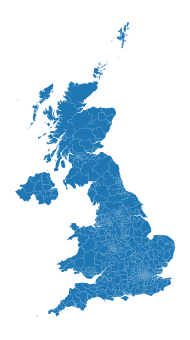

In [21]:
f, ax = plt.subplots(1, figsize=(6, 6))
ax = map_df.plot(ax=ax)
ax.set_axis_off()

The "ax" is the plot axes. So the first line above sets f (the figure) with ax (the axes) to use the Matpotlib library to map the constituencies on a figures that 6x6.  You can change the size of figure by changing the figsize values.

Learn more about the specifics of mapping at: http://geopandas.org/mapping.html



Now that we have a map, we want to add constituency-level data that will color in the map. 

For the module, we will explore the percentage of the electorate who signed the petition to Revoke Article 50. 

A brief primer for those who were unaware: UK citizens can start petitions, through an official government website, which bind the government to debate the topic of the petition in parliament if a certain number of signatures are reached. In March 2019, a petition to revoke Article 50, the legal mechanism by which the UK leaves the EU, reached millions of signatures in just a couple of days.

The petition data is a JSON file which, among other things, breaks down the signature count by parliamentary constituency. WIth this data, we can easily plot a map to visualise the data on a national level. 

Before we can add this data to the dataframe, however, we have to convert the [JSON](https://www.programiz.com/python-programming/json) file to a [CSV](https://docs.python.org/2/library/csv.html) file format.

We have again already download the JSON file in the ./data/ folder, but you can look at the [petition website](https://petition.parliament.uk/petitions/241584) if you want read more about the context and download the file for yourself.


In [22]:
import csv
import json
file = "./data/petition_data.json"

Note that the data on the petition signatures is in a JSON file format. JSON stands for JavaScript Object Notation. JSON is a lightweight format for storing and transporting data.  If you are curious, go in the ./data/ folder to see the JSON file. If you do a search (CMD + F) in the JSON file you will, for example, there is section of data with "signatures_by_constituency", and this is the data we are looking for. 

We don't want to use the JSON file however, so we first want to write the information we want from the JSON file over to a CSV file that we will use in creating the map. To do this we we will first read ('r") the data we want out of the JSON file (the signatures_by_constituency which are in attributes, which are in data, in the JSON file) , then create a new CSV file (which we will call 'save_file' momentarily) and write ('w') the information to the new CSV file.

You can read more about reading and writing to CSV files here: https://docs.python.org/3/library/csv.html  This includes documentation on the DictWriter() function that we use here.

In [23]:
with open(file, "r", encoding="utf-8") as json_file:
  data = json.load(json_file)
data = data["data"]["attributes"]["signatures_by_constituency"]
keys = data[0].keys()
save_file = "petition_data.csv"
with open(save_file, 'w') as f:
  dict_writer = csv.DictWriter(f, keys)
  dict_writer.writeheader()
  dict_writer.writerows(data)

With the CSV now available, we can use pandas to read the CSV file.

Let's see what is in our file now

In [24]:
import pandas as pd
data_df = pd.read_csv("petition_data.csv")
print(data_df.head())

                        name   ons_code                    mp  signature_count
0             Edinburgh East  S14000022     Tommy Sheppard MP            19563
1  Edinburgh North and Leith  S14000023       Deidre Brock MP            28081
2            Edinburgh South  S14000024         Ian Murray MP            20615
3       Edinburgh South West  S14000025   Joanna Cherry QC MP            17869
4             Edinburgh West  S14000026  Christine Jardine MP            15227


The data includes the constituencies again, this time in the column called "name" and it includes the number of signatures from people in each constituency.  

Let's look to see if there is any missing data in the columns that might mess up our code later.

In [25]:
print(data_df.isna().sum())

name               0
ons_code           0
mp                 0
signature_count    0
dtype: int64


Good, we have data for each data element.

Now we have a map and we have data on the number of signature, so we must combine those datasets together.
Let take a look at the header information for the map again, so we can see how we want to combine.

In [26]:
print(map_df.head())

   objectid   pcon17cd                  pcon17nm   bng_e   bng_n    long  \
0         1  E14000530                 Aldershot  484884  155126 -0.7841   
1         2  E14000531       Aldridge-Brownhills  404723  302568 -1.9316   
2         3  E14000532  Altrincham and Sale West  374132  389051 -2.3904   
3         4  E14000533              Amber Valley  440478  349675 -1.3977   
4         5  E14000534   Arundel and South Downs  510689  115542 -0.4263   

         lat    st_areasha     st_lengths  \
0  51.289001  5.300200e+07   40826.569141   
1  52.620899  4.403349e+07   38222.291898   
2  53.397701  5.092603e+07   46097.782457   
3  53.042801  1.246377e+08   62106.010829   
4  50.928699  6.452209e+08  328652.510840   

                                            geometry  
0  POLYGON ((485406.902 159918.603, 485465.904 15...  
1  POLYGON ((400715.498 304323.098, 400862.202 30...  
2  POLYGON ((369941.302 390805.702, 369994.598 39...  
3  POLYGON ((444868.402 353958.100, 444796.497 35...

Lets combine these dataframes and then see if we have any new missing data to worry about.  We will combine them by using the constituency name, and then look for missing data.

In [27]:

combined_data = map_df.set_index("pcon17nm").join(data_df.set_index("name")).reset_index()
combined_data.isna().sum()

pcon17nm           0
objectid           0
pcon17cd           0
bng_e              0
bng_n              0
long               0
lat                0
st_areasha         0
st_lengths         0
geometry           0
ons_code           9
mp                 9
signature_count    9
dtype: int64

We are missing some data for ons_code, mp, and signature count.  For those we will just replace the missing data with 0 or "No MP" (though we are not using the MP column for our current project).

In [28]:
combined_data["ons_code"].fillna(0, inplace=True)
combined_data["mp"].fillna("No MP", inplace=True)
combined_data["signature_count"].fillna(0, inplace=True)
combined_data.isna().sum()

pcon17nm           0
objectid           0
pcon17cd           0
bng_e              0
bng_n              0
long               0
lat                0
st_areasha         0
st_lengths         0
geometry           0
ons_code           0
mp                 0
signature_count    0
dtype: int64

We now have clean data to work with, though if we were doing this for a bigger project we would want to go back into the data to investigate why we had those issues in the data and if those elements will impact on our map and analysis. 

Let's map this data to see what it looks like.

(-32857.38503500014, 688430.6161349997, -55405.24018500056, 1281049.441684999)

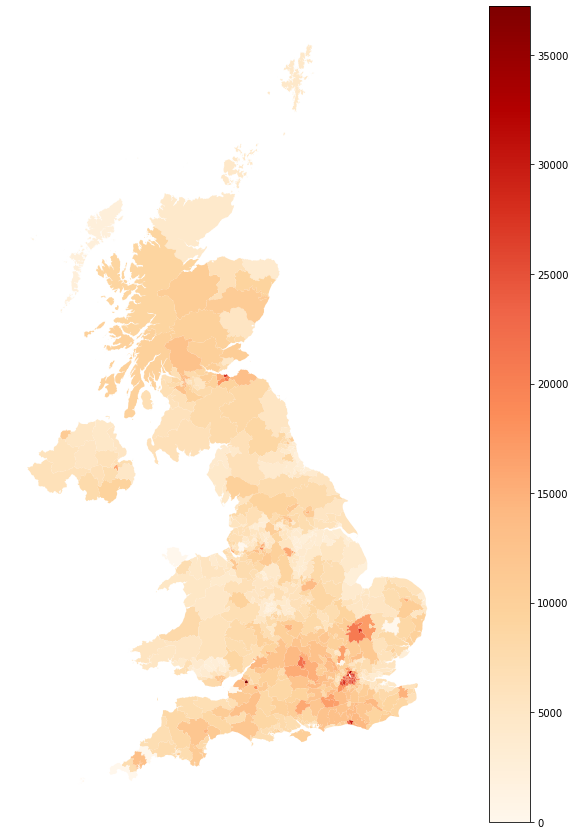

In [29]:

f, ax = plt.subplots(1, figsize=(15, 15))
ax = combined_data.plot(column="signature_count", cmap="OrRd", linewidth=0.8, ax=ax, legend=True)
ax.axis("off")


That looks good. Remember, this is the total number of petitions signed in each constituency. But what would be more useful is to know what percentage of voters in each constituency submitted a petition.  To get that we can add data on the total number of people eligble to vote into data and then we can calculate the percentage of voters who signed petitions for each constituency.

We have again included a file in the ./data/ folder with information on the number of voters in each constituency. Most easy to find was from 2015, so it is not a perfect match to our 2019 data -- but it will get us close and it will serve our purpose for this tutorial.


In [30]:

electorate_df = pd.read_csv("./data/ge2015_electorate.csv")
electorate_df.head()

,constituency_name,electorate
0,Aberavon,49821
1,Aberconwy,45525
2,Aberdeen North,67745
3,Aberdeen South,68056
4,Airdrie and Shotts,66792


Now again we combine the dataframes based on the constituency name, and check the new dataframe to see what it looks like.

In [31]:
combined = map_df.set_index("pcon17nm").join(data_df.set_index("name")).join(electorate_df.set_index("constituency_name")).reset_index()
combined_data.head()


,pcon17nm,objectid,pcon17cd,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,ons_code,mp,signature_count
0,Aldershot,1,E14000530,484884,155126,-0.7841,51.289001,5.300200e+07,40826.569141,"POLYGON ((485406.902 159918.603, 485465.904 15...",E14000530,Leo Docherty MP,7570.0
1,Aldridge-Brownhills,2,E14000531,404723,302568,-1.9316,52.620899,4.403349e+07,38222.291898,"POLYGON ((400715.498 304323.098, 400862.202 30...",E14000531,Wendy Morton MP,3025.0
2,Altrincham and Sale West,3,E14000532,374132,389051,-2.3904,53.397701,5.092603e+07,46097.782457,"POLYGON ((369941.302 390805.702, 369994.598 39...",E14000532,Sir Graham Brady MP,13353.0
3,Amber Valley,4,E14000533,440478,349675,-1.3977,53.042801,1.246377e+08,62106.010829,"POLYGON ((444868.402 353958.100, 444796.497 35...",E14000533,Nigel Mills MP,4129.0
4,Arundel and South Downs,5,E14000534,510689,115542,-0.4263,50.928699,6.452209e+08,328652.510840,"MULTIPOLYGON (((520051.591 112423.909, 520087....",E14000534,Andrew Griffith MP,12824.0


We can again clean the data to take care of missing data.

In [32]:

combined["electorate"].fillna(1e8, inplace=True)
combined["mp"].fillna("No MP", inplace=True)
combined["signature_count"].fillna(0, inplace=True)
combined_data.isna().sum()


pcon17nm           0
objectid           0
pcon17cd           0
bng_e              0
bng_n              0
long               0
lat                0
st_areasha         0
st_lengths         0
geometry           0
ons_code           0
mp                 0
signature_count    0
dtype: int64

We can now calculate the percentage signatures from the voting eligible population in each constituency.

In [33]:
combined_data['signature_pc'] = 100 * combined["signature_count"]/combined["electorate"]

And check to see the range of percentages.

In [34]:
print(combined_data['signature_pc'].min())
print(combined_data['signature_pc'].max())

0.0
40.78981980797054


This looks reasonable, so lots map it.

(-32857.38503500014, 688430.6161349997, -55405.24018500056, 1281049.441684999)

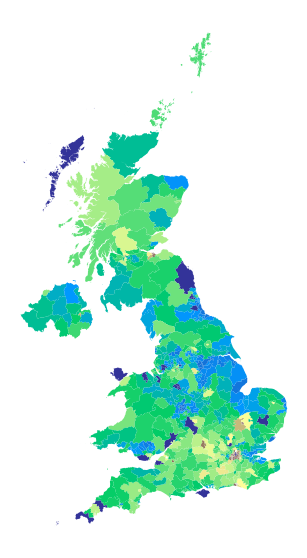

In [37]:
fig, ax = plt.subplots(1, figsize=(10, 10))
combined_data.plot(column="signature_pc", cmap="terrain", linewidth=0.8, ax=ax)
ax.axis("off")



We can also add a scale to the map to help translate what it means.

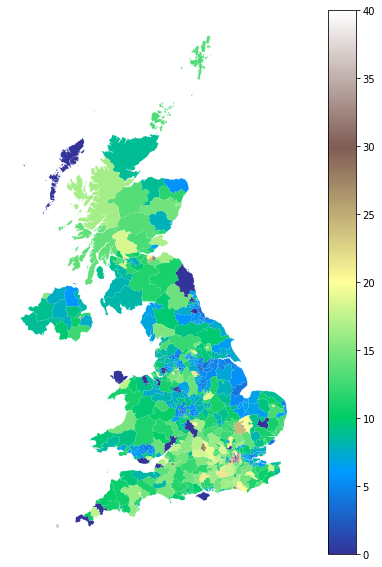

In [39]:
fig, ax = plt.subplots(1, figsize=(10, 10))
combined_data.plot(column="signature_pc", cmap="terrain", linewidth=0.8, ax=ax)
ax.axis("off")

vmin = 0.
vmax = 40.
sm = plt.cm.ScalarMappable(cmap="terrain", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

Looking at the above map, you would be forgiven for thinking that, because the petition only reached a high percentage of signatures in a few constituencies, it was, on the whole, unpopular. However, those of you familiar with the country may recognise the bright spot towards the bottom right of the map. That bright spot is London, and is home to several million people.

This perfectly demonstrates how maps plotting percentage, rather than absolute, popularity can mislead people when drawing conclusions. While maps such as these are great for demonstrating the geographic distribution of a thing, we are biased to lending more importance to larger regions.


## Your Turn
We have included a dataset of Brexit results by constituency in the ./data/ folder.  Can you use that data to create a map that looks the one below?  Give it a shot.  

It should look similar to this.

If you can't quite get it, the code is below, just highlight the area with your mouse and you will it.


<img src="./data/brexit-data-map-sample.png"  width="400" height="400" />

<span style="color:white">
import pandas as pd <br> 
import csv  <br>
import geopandas as gpd <br>
import matplotlib.pyplot as plt <br>
map_df = gpd.read_file("./shapes /Westminster_Parliamentary_Constituencies_December_2017_Generalised_Clipped_Boundaries_in_the_UK.shp")<br>
brexit_file = pd.read_csv("./data/brexit-referendum-results.csv") <br>
brexit_combined_data = map_df.set_index("pcon17nm").join(brexit_file.set_index("Constituency")).reset_index()<br>
brexit_combined_data.isna().sum()<br>
brexit_combined_data["Geo Point"].fillna(1e8, inplace=True)<br>
brexit_combined_data["Geo Shape"].fillna(0, inplace=True)<br>
brexit_combined_data["% Leave"].fillna(0, inplace=True)<br>
fig, ax = plt.subplots(1, figsize=(10, 10))<br>
brexit_combined_data.plot(column="% Leave", cmap="terrain", linewidth=0.8, ax=ax)<br>
ax.axis("off")<br>
vmin = 0.<br>
vmax = 40.<br>
sm = plt.cm.ScalarMappable(cmap="terrain", norm=plt.Normalize(vmin=vmin, vmax=vmax))<br>
sm._A = []<br>
cbar = fig.colorbar(sm)<br>
    </span>

Bexit data from: https://public.opendatasoft.com/explore/dataset/brexit-referendum-results-by-constituency/export/

In [ ]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())